In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# installing the needed libraries

!pip install pyLDAvis --upgrade --quiet
!pip install opendatasets --upgrade --quiet
!pip install gensim --upgrade --quiet
!pip install nltk --upgrade --quiet
!pip install pyLDAvis --upgrade --quiet
!pip install spacy --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install textblob --upgrade --quiet
!pip install plotly  --upgrade --quiet
!pip install chart_studio --upgrade --quiet
!pip install cufflinks --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install statsmodels --upgrade --quiet
!pip install bs4 --upgrade --quiet


In [2]:
# importing all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pprint import pprint
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim


# natural language toolkit is used to download stopwords, vader lexicon & punkt
nltk.download(["stopwords","vader_lexicon","punkt"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# the relevant libraries are imported
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import re

customer_review = []

# each page is looped through to extract data to be appended to the customer_review list
for i in range(1,355):
  url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
  ba_reviews = requests.get(url)
  response = ba_reviews.content
  soup = BeautifulSoup(response, 'html.parser')

  first_article = soup.find('article', class_='comp comp_reviews-airline querylist position-content')
  review_articles = first_article.find_all('article', {'itemprop': 'review'})

  for review in review_articles:
      def reviewer_name():
        reviewer = review.find('span', itemprop="name").text
        if reviewer is None:
          return None
        else:
          return reviewer

      def general_rating():
        rating_element = review.find('span', itemprop="ratingValue")
        if rating_element is not None:
            return rating_element.text
        else:
            pass

      def comm_head():
        comment_header = review.find('h2',  class_="text_header").text
        if comment_header is None:
          return None
        else:
          return comment_header

      def comment_body():
        comment = review.find('div',  class_="text_content").text
        if comment is None:
          return None
        else:
          return comment

      def aircraft():
          first_td = review.find('td', class_='review-rating-header aircraft')
          if first_td is None:
              return None
          else:
              return first_td.find_next_sibling('td', class_="review-value").text

      def trav_type():
          traveller_td = review.find('td', class_='review-rating-header type_of_traveller')
          if traveller_td is None:
              return None
          else:
              return traveller_td.find_next_sibling('td', class_="review-value").text

      def seated_type():
          seat_td = review.find('td', class_='review-rating-header cabin_flown')
          if seat_td is None:
              return None
          else:
              return seat_td.find_next_sibling('td', class_="review-value").text

      def route_type():
          route_td = review.find('td', class_='review-rating-header route')
          if route_td is None:
              return None
          else:
              return route_td.find_next_sibling('td', class_="review-value").text

      def date_flown_func():
          date_flown_td = review.find('td', class_='review-rating-header date_flown')
          if date_flown_td is None:
              return None
          else:
              return date_flown_td.find_next_sibling('td', class_="review-value").text

      def seat_comfy():
          seat_comfort_header = review.find('td', class_="review-rating-header seat_comfort")
          if seat_comfort_header is None:
              return None
          else:
              seat_comfort = seat_comfort_header.parent
              filled_stars = seat_comfort.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def wify():
          wifi_header = review.find('td', class_="review-rating-header wifi_and_connectivity")
          if wifi_header is None:
              return None
          else:
              wifi = wifi_header.parent
              filled_stars = wifi.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def cabin_staff():
          cabin_staff_services = review.find('td', class_="review-rating-header cabin_staff_service")
          if cabin_staff_services is None:
              return None
          else:
              cabin_staff_service = cabin_staff_services.parent
              filled_stars = cabin_staff_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def f_b():
          food_and_bev = review.find('td', class_="review-rating-header food_and_beverages")
          if food_and_bev is None:
              return None
          else:
              food_and_beverages = food_and_bev.parent
              filled_stars = food_and_beverages.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def recommended():
          first_td = review.find('td', class_="review-rating-header recommended")
          if first_td is None:
              return None
          else:
            second_td = first_td.find_next_sibling('td', class_="review-value rating-no")
            return 0 if second_td else 1

      def inflight_ent():
          inflight_enter = review.find('td', class_="review-rating-header inflight_entertainment")
          if inflight_enter is None:
              return None
          else:
              flight_ent = inflight_enter.parent
              filled_stars = flight_ent.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def ground_service():
          ground_services = review.find('td', class_="review-rating-header ground_service")
          if ground_services is None:
              return None
          else:
              g_service = ground_services.parent
              filled_stars = g_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def val_money():
          value_for_money = review.find('td', class_="review-rating-header value_for_money")
          v_for_money = value_for_money.parent
          filled_stars = v_for_money.find_all('span', class_ = "star fill")
          return max([star.text for star in filled_stars]) if filled_stars else None

      customer_review.append([reviewer_name(), general_rating(), comm_head(), comment_body(),
                              aircraft(), trav_type(), seated_type(), route_type(), date_flown_func(),
                              seat_comfy(), wify(), cabin_staff(), f_b(), inflight_ent(), ground_service(), val_money(), recommended()])




In [4]:
# customer_view list is used to create a dataframe
df = pd.DataFrame(customer_review, columns=['reviewer', 'overall rating', 'comment head', 'comment body',
                                            'aircraft', 'travel type', 'seat type', 'route', 'date flown',
                                            'seat comfort', 'wifi', 'cabin services', 'food & drink', 'entertainment',
                                            'ground services', 'value_money', 'recommended'])
df.head()


,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Mal MacLeod,5,"""Club Europe is simply a joke""",Not Verified | I am a frequent flyer with BA ...,A320,Business,Business Class,London to Istanbul,October 2023,3,1,4,1,1,3,2,0
1,J Tydeman,4,"""Very second rate shoddy airline""",Not Verified | Flew with BA to Punta Cana. To...,None,Couple Leisure,Economy Class,London Gatwick to Punta Cana,October 2023,3,None,3,3,2,2,2,0
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",✅ Trip Verified | They downgraded me from bu...,None,Solo Leisure,Business Class,London to Hong Kong,July 2023,1,None,5,3,3,5,1,0
3,Glenn Taylor-Biffen,1,"""Never again BA""",✅ Trip Verified | The already delayed aircra...,A320,Couple Leisure,Economy Class,Catania to Gatwick,October 2023,1,None,1,1,None,1,1,0
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",✅ Trip Verified | Caught up in the Gatwick c...,None,Couple Leisure,Economy Class,Gatwick to Venice,September 2023,None,None,None,None,None,1,1,0


In [6]:
# regex is used to drop some unwanted text/characters from the comment column
pattern = r'✅ Trip Verified \| |Not Verified \| |❎ Not Verified \| |✅ Verified Review \| |\✅ Trip Verified \|'
df['comment body'] = df['comment body'].str.replace(pattern, '', regex=True)

df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,A320,Business,Business Class,London to Istanbul,October 2023,3,1,4,1,1,3,2,0
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,None,Couple Leisure,Economy Class,London Gatwick to Punta Cana,October 2023,3,None,3,3,2,2,2,0
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,None,Solo Leisure,Business Class,London to Hong Kong,July 2023,1,None,5,3,3,5,1,0
3,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,A320,Couple Leisure,Economy Class,Catania to Gatwick,October 2023,1,None,1,1,None,1,1,0
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,None,Couple Leisure,Economy Class,Gatwick to Venice,September 2023,None,None,None,None,None,1,1,0


In [7]:
df.columns

Index(['reviewer', 'overall rating', 'comment head', 'comment body',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'wifi', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended'],
      dtype='object')

In [8]:
# Replace all NaN values with 0
df.fillna(0, inplace=True)

# check for missing values
num_columns_with_missing_values = df.isnull().any().sum()
print("Number of columns with missing values:", num_columns_with_missing_values)


Number of columns with missing values: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer         3540 non-null   object
 1   overall rating   3540 non-null   object
 2   comment head     3540 non-null   object
 3   comment body     3540 non-null   object
 4   aircraft         3540 non-null   object
 5   travel type      3540 non-null   object
 6   seat type        3540 non-null   object
 7   route            3540 non-null   object
 8   date flown       3540 non-null   object
 9   seat comfort     3540 non-null   object
 10  wifi             3540 non-null   object
 11  cabin services   3540 non-null   object
 12  food & drink     3540 non-null   object
 13  entertainment    3540 non-null   object
 14  ground services  3540 non-null   object
 15  value_money      3540 non-null   object
 16  recommended      3540 non-null   int64 
dtypes: int64(1), object(16)
memory us

In [10]:
# List of columns to convert
cols_to_convert = ['overall rating', 'seat comfort', 'cabin services', 'food & drink', 'entertainment', 'ground services', 'value_money', 'recommended']

# Convert specific columns to numeric
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# convert date flown column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewer         3540 non-null   object        
 1   overall rating   3540 non-null   int64         
 2   comment head     3540 non-null   object        
 3   comment body     3540 non-null   object        
 4   aircraft         3540 non-null   object        
 5   travel type      3540 non-null   object        
 6   seat type        3540 non-null   object        
 7   route            3540 non-null   object        
 8   date flown       3540 non-null   datetime64[ns]
 9   seat comfort     3540 non-null   int64         
 10  wifi             3540 non-null   object        
 11  cabin services   3540 non-null   int64         
 12  food & drink     3540 non-null   int64         
 13  entertainment    3540 non-null   int64         
 14  ground services  3540 non-null   int64  

In [11]:
df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,A320,Business,Business Class,London to Istanbul,2023-10-01,3,1,4,1,1,3,2,0
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0,Couple Leisure,Economy Class,London Gatwick to Punta Cana,2023-10-01,3,0,3,3,2,2,2,0
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0,Solo Leisure,Business Class,London to Hong Kong,2023-07-01,1,0,5,3,3,5,1,0
3,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,A320,Couple Leisure,Economy Class,Catania to Gatwick,2023-10-01,1,0,1,1,0,1,1,0
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0,Couple Leisure,Economy Class,Gatwick to Venice,2023-09-01,0,0,0,0,0,1,1,0


In [12]:
df.tail()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
3535,Ryan Thomas,1,British Airways customer review,Travelled from OZ to watch start of TDF in Lee...,0,0,Economy Class,0,1970-01-01,1,0,1,1,1,0,1,0
3536,Luke Toornent,7,British Airways customer review,I flew AMS-LGW-MCO and JFK-LHR-AMS this month....,0,0,Economy Class,0,1970-01-01,2,0,4,4,3,0,4,1
3537,C Denson,5,British Airways customer review,London LHR to Hong Kong on 27 May. Was really ...,0,0,Premium Economy,0,1970-01-01,4,0,2,3,3,0,3,0
3538,Jeff Smith,7,British Airways customer review,Flew LHR to Larnaca and return 22nd April and ...,0,0,Business Class,0,1970-01-01,3,0,4,3,2,0,3,0
3539,Tom Adamson,5,British Airways customer review,"LHR-SEA in ""first"" class. The experience was r...",0,0,First Class,0,1970-01-01,3,0,4,2,2,0,3,0


In [13]:
df.shape

(3540, 17)

In [14]:
# printing the number of unique values for date flown column
print(df['date flown'].dt.year.unique())

# printing the minimum year in the date flown column
print(df['date flown'].dt.year.min())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 1970]
1970


In [15]:
# printing the number of rows with year less than 2014
print(len(df[df['date flown'].dt.year < 2014]))

642


In [16]:
# remove the entire row of any 'date flown' with year older than 2014
df = df[df['date flown'].dt.year >= 2014]

In [17]:
# Cross check number of unique values for date flown column after removing rows with year less than 2014
print(df['date flown'].dt.year.unique())

# printing the minimum year in the date flown column after removing rows with year less than 2014
print(df['date flown'].dt.year.min())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
2014


In [18]:
df.shape

(2898, 17)

In [19]:
print(df[df['date flown'].dt.year == 2014]['date flown'])

2652   2014-12-01
2780   2014-09-01
2837   2014-09-01
2840   2014-12-01
2856   2014-08-01
2867   2014-10-01
2870   2014-11-01
2871   2014-11-01
2885   2014-07-01
Name: date flown, dtype: datetime64[ns]


# SENTIMENT ANALYSIS

VADER(Valence Aware Dictionary and Sentiment Reasoner) 

In [20]:
# relevants columns are selected for VADER sentiment analysis
df_sentiment = df[['reviewer', 'overall rating', 'comment head', 'comment body' ]]

reviews = df_sentiment['comment body']


In [21]:
# using the VADER pre-trained sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define the get_sentiment_scores function
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

In [22]:
# apply the get_sentiment_scores function to each review
df_sentiment['sentiment_scores'] = reviews.apply(get_sentiment_scores)

In [23]:
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,sentiment_scores
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,"{'neg': 0.05, 'neu': 0.784, 'pos': 0.166, 'com..."
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,"{'neg': 0.059, 'neu': 0.922, 'pos': 0.019, 'co..."
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,"{'neg': 0.15, 'neu': 0.767, 'pos': 0.083, 'com..."
3,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,"{'neg': 0.107, 'neu': 0.844, 'pos': 0.048, 'co..."
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,"{'neg': 0.035, 'neu': 0.874, 'pos': 0.09, 'com..."


In [24]:
'''The negative, neutral, and positive scores represent the proportion of the text that falls into each category, 
while the compound score represents an aggregated score that ranges from -1 (most negative) to 1 (most positive) 
and reflects the overall sentiment of the text.'''

# create new columns for each sentiment score
df_sentiment['vader_neg'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neg'])
df_sentiment['vader_neu'] = df_sentiment['sentiment_scores'].apply(lambda x: x['neu'])
df_sentiment['vader_pos'] = df_sentiment['sentiment_scores'].apply(lambda x: x['pos'])
df_sentiment['vader_compound'] = df_sentiment['sentiment_scores'].apply(lambda x: x['compound'])

# drop the original sentiment_scores column
df_sentiment.drop('sentiment_scores', axis=1, inplace=True)

df_sentiment.head()

,reviewer,overall rating,comment head,comment body,vader_neg,vader_neu,vader_pos,vader_compound
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,0.050,0.784,0.166,0.9882
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0.059,0.922,0.019,-0.6127
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0.150,0.767,0.083,-0.9273
3,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,0.107,0.844,0.048,-0.8614
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0.035,0.874,0.090,0.8674


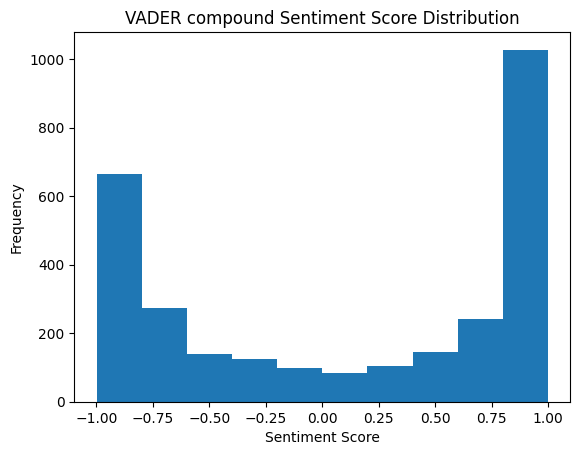

In [25]:
# visual distribution of sentiment scores in a histogram
plt.hist(df_sentiment["vader_compound"])
plt.title("VADER compound Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

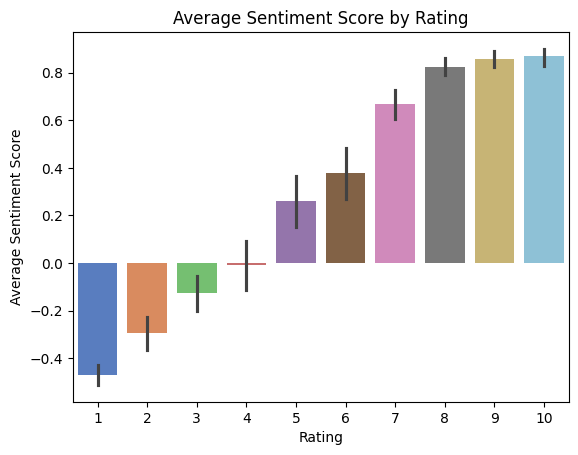

In [26]:
'''bar plot of the average VADER sentiment score for each rating category'''

'''the overall rating should skew towards the direction of the sentiment score.
if the rating is high, the sentiment score should also be high and vice versa'''

# Filter out rows where 'overall rating' is 0
df_sentiment_filtered = df_sentiment[df_sentiment['overall rating'] != 0]

# Create the bar plot with the color palette
ax = sns.barplot(x="overall rating", y="vader_compound", data=df_sentiment_filtered, palette="muted")
ax.set_title("Average Sentiment Score by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Sentiment Score")
plt.show()


In [27]:
# categorizing the sentiment as "negative", "neutral", or "positive" based on the value of the score
def map_sentiment(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'

df_sentiment['vader_sentiment_category'] = df_sentiment['vader_compound'].apply(map_sentiment)
df_sentiment.head()


,reviewer,overall rating,comment head,comment body,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,0.050,0.784,0.166,0.9882,positive
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0.059,0.922,0.019,-0.6127,negative
2,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0.150,0.767,0.083,-0.9273,negative
3,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,0.107,0.844,0.048,-0.8614,negative
4,Glenn Taylor-Biffen,2,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0.035,0.874,0.090,0.8674,positive


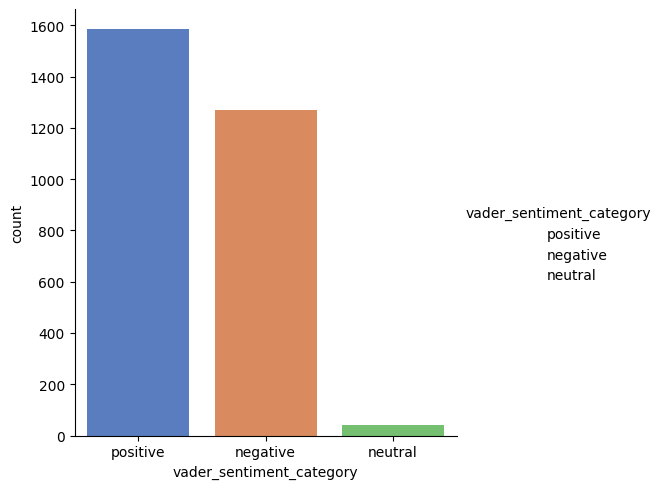

In [28]:
'''to get a clearer picture of the customer sentiment, they are grouped
according to their sentiment score. They are in 3 distinct groups of
positive, neutral and negative. The catplot below is a graphical
representation of the result.'''


sns.catplot(x='vader_sentiment_category', kind='count', data=df_sentiment, palette="muted")

RoBERTa Tranformer Model from Hugging Face

In [29]:
!pip install transformers --upgrade --quiet

In [30]:
!pip install torch --upgrade --quiet
!pip install tensorflow --upgrade --quiet
!pip install flax --upgrade --quiet

In [31]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [32]:
# Importing the libraries for Roberta sentiment analysis
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
# Function to calculate sentiment score using Roberta
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg': scores[0], 'roberta_neu': scores[1], 'roberta_pos': scores[2]}
    return scores_dict

In [34]:
# create a dictionary of polarity scores for each review
res = {}
num_errors = 0
for i, review in enumerate(reviews):
    try:
        roberta_result = polarity_scores_roberta(review)
    except RuntimeError:
        print(f"Error at row {i}")
        num_errors += 1
        continue
    res[i] = roberta_result

print(f"Encountered {num_errors} errors.")

Error at row 9
Error at row 42
Error at row 64
Error at row 109
Error at row 123
Error at row 178
Error at row 183
Error at row 202
Error at row 225
Error at row 233
Error at row 311
Error at row 331
Error at row 396
Error at row 455
Error at row 477
Error at row 532
Error at row 601
Error at row 602
Error at row 739
Error at row 763
Error at row 796
Error at row 896
Error at row 920
Error at row 984
Error at row 996
Error at row 1052
Error at row 1067
Error at row 1084
Error at row 1089
Error at row 1094
Error at row 1105
Error at row 1169
Error at row 1175
Error at row 1176
Error at row 1230
Error at row 1305
Error at row 1334
Error at row 1354
Error at row 1357
Error at row 1358
Error at row 1362
Error at row 1374
Error at row 1377
Error at row 1392
Error at row 1412
Error at row 1425
Error at row 1459
Error at row 1480
Error at row 1481
Error at row 1501
Error at row 1510
Error at row 1527
Error at row 1569
Error at row 1606
Error at row 1607
Error at row 1675
Error at row 1716
Err

In [35]:
print(res[0])

{'roberta_neg': 0.4424562, 'roberta_neu': 0.40860155, 'roberta_pos': 0.14894232}


In [36]:
import numpy as np

# merge the polarity scores with the original dataframe
for key in res.keys():
    df_sentiment.loc[key, 'roberta_neg'] = res[key]['roberta_neg']
    df_sentiment.loc[key, 'roberta_neu'] = res[key]['roberta_neu']
    df_sentiment.loc[key, 'roberta_pos'] = res[key]['roberta_pos']

# fill NaN values for reviews that encountered errors
df_sentiment.fillna(value=np.nan, inplace=True)

In [37]:
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category,roberta_neg,roberta_neu,roberta_pos
0,Mal MacLeod,5.0,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,0.050,0.784,0.166,0.9882,positive,0.442456,0.408602,0.148942
1,J Tydeman,4.0,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0.059,0.922,0.019,-0.6127,negative,0.608204,0.336775,0.055021
2,Hugh Kilpatrick,1.0,"""some sort of medieval torture""",They downgraded me from business to premium ...,0.150,0.767,0.083,-0.9273,negative,0.885566,0.097856,0.016577
3,Glenn Taylor-Biffen,1.0,"""Never again BA""",The already delayed aircraft landed and apar...,0.107,0.844,0.048,-0.8614,negative,0.669985,0.258437,0.071578
4,Glenn Taylor-Biffen,2.0,"""BA Gatwick are not BA""",Caught up in the Gatwick cancellation fiasc...,0.035,0.874,0.090,0.8674,positive,0.408967,0.446636,0.144397


Comparing VADER and RoBERTa Models

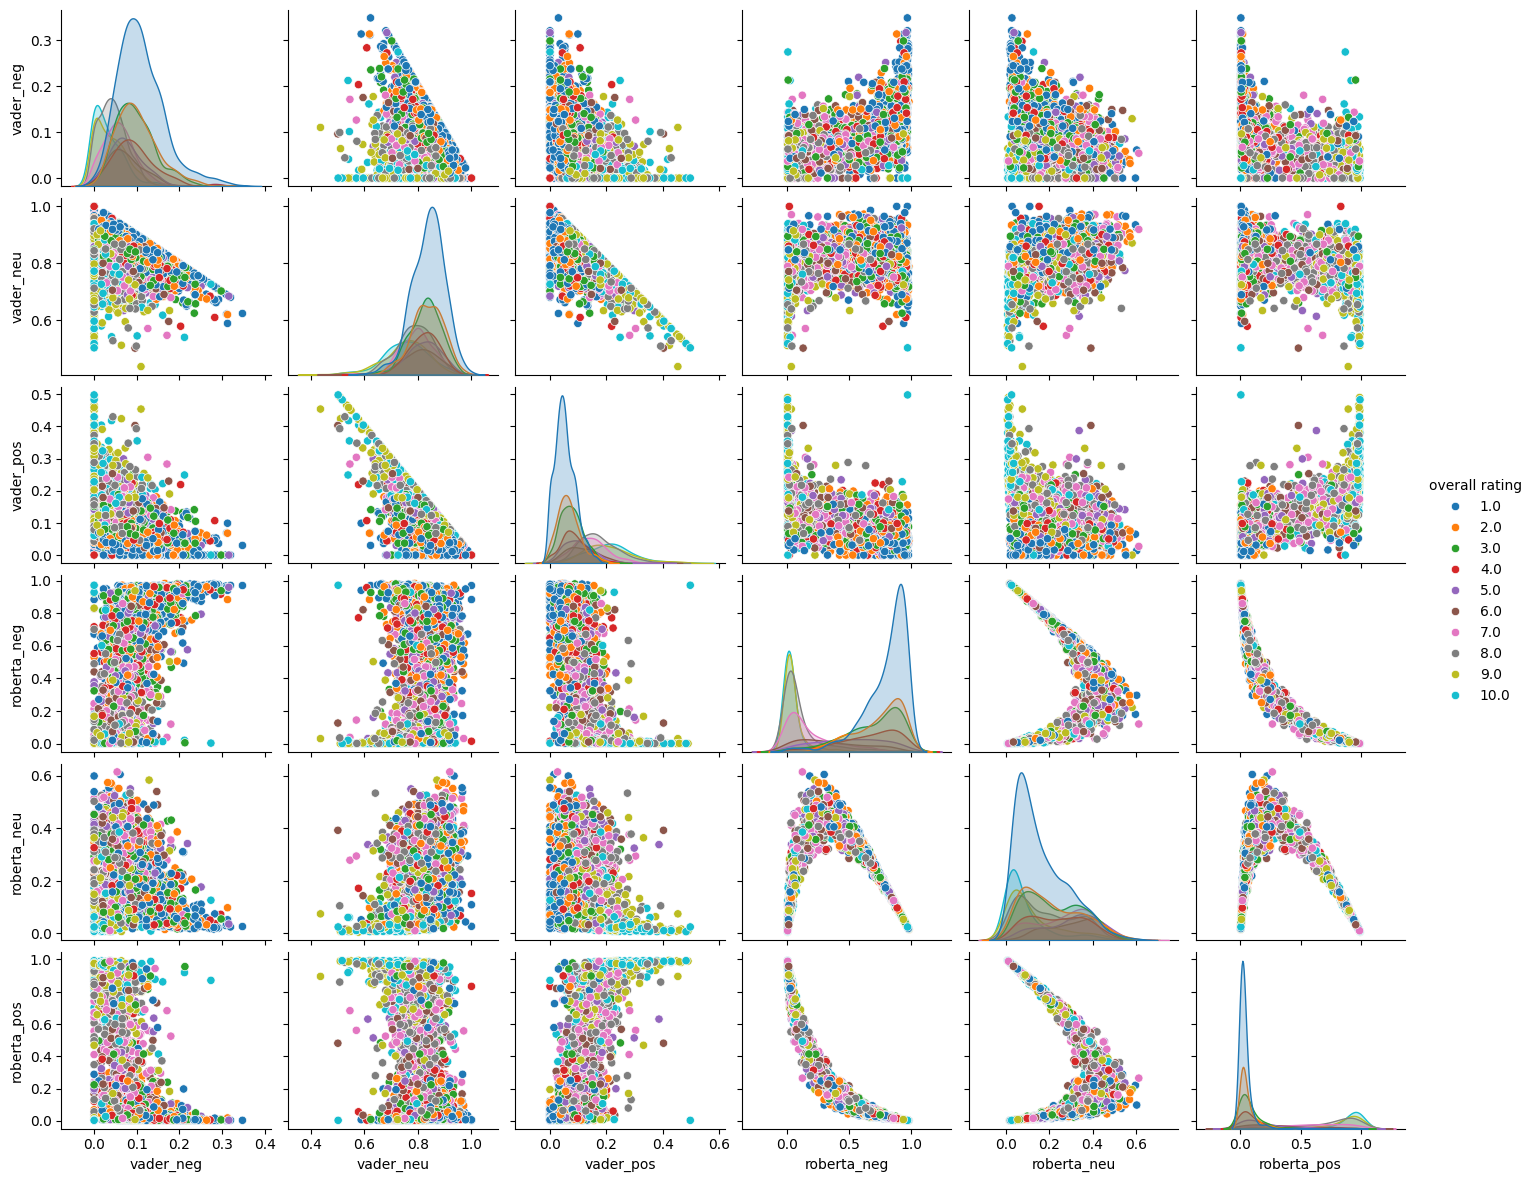

In [38]:
# Pairplot of the sentiment scores comparison between VADER and Roberta
sns.pairplot(data=df_sentiment, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='overall rating', palette= 'tab10', height=2, aspect=1.2)
plt.show()

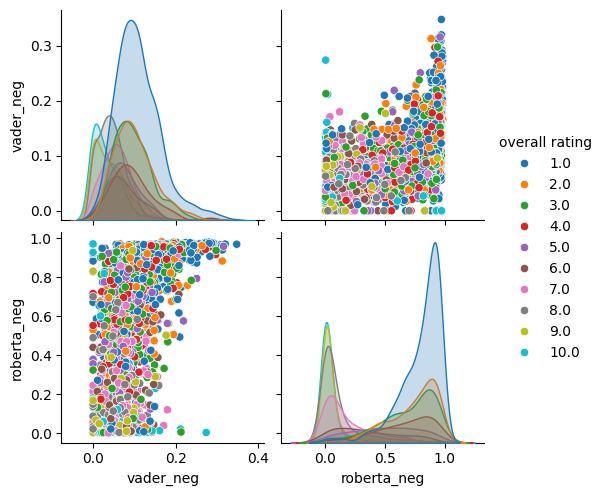

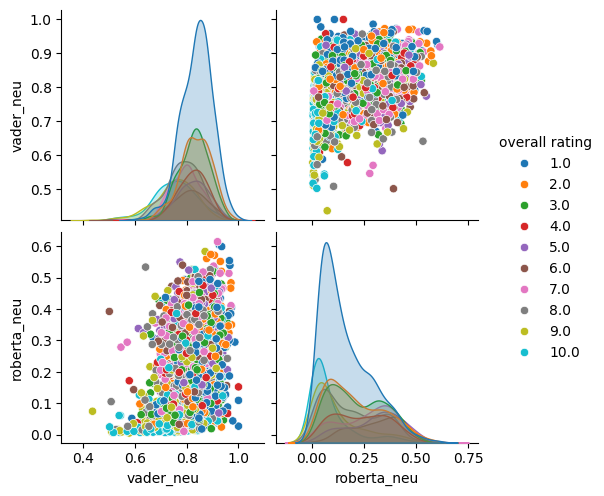

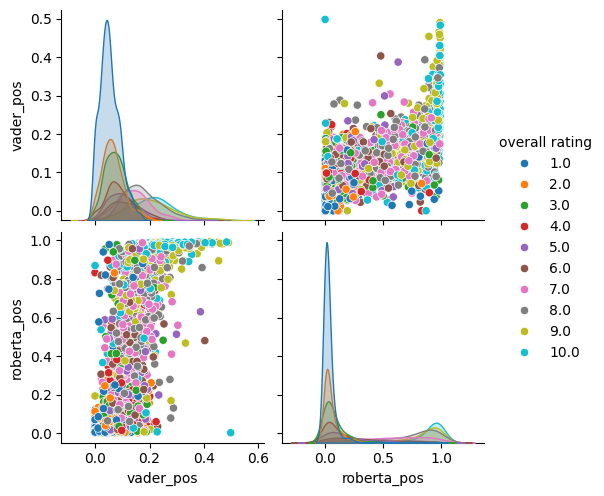

In [39]:
# Pairplot of the sentiment scores comparison between VADER and Roberta for Neg, Neu, Pos

# create a pairplot of the VADER and RoBERTa negative scores
sns.pairplot(data=df_sentiment, vars=['vader_neg', 'roberta_neg'], hue='overall rating', palette= 'tab10')

# create a pairplot of the VADER and RoBERTa neutral scores
sns.pairplot(data=df_sentiment, vars=['vader_neu', 'roberta_neu'], hue='overall rating', palette= 'tab10')

# create a pairplot of the VADER and RoBERTa positive scores
sns.pairplot(data=df_sentiment, vars=['vader_pos', 'roberta_pos'], hue='overall rating', palette= 'tab10')

Review some examples with both models

In [40]:
# Reviewing the comments with negative VADER sentiment score and positive RoBERTa sentiment score
count = 0
for index, row in df_sentiment.iterrows():
    if row['vader_sentiment_category'] == 'negative' and row['roberta_pos'] > 0.05:
        print(row['comment body'])
        count += 1
        if count == 5:
            break

 Flew with BA to Punta Cana. Took the trouble to reserve seats for both outbound and inbound flights. On boarding at Gatwick, realised we had been moved to much less good seats with other people sitting in the seats we had spent a lot of money reserving. Apparently there has been a change of aircraft and a number of passengers had been automatically reallocated seats for no particular reason. The crew said there was nothing they could do (although of course they could just have swapped us with the couple using our seats). We were told to claim a refund on return home. We did this via a complaint form Ns BA offered us £100 in vouchers. We didn't accept this as it was less than the cost of the seats and also naturally we wanted our money back. We eventually got it but not without a fight. Very second rate shoddy airline.
  The already delayed aircraft landed and apart from the small BA logo on the rear of the fuselage, there was no indication as to whom the carrier really was. Boarding t

In [41]:
"""This will return the highest vader positive score with an overall rating of 1. 
This is to show where the VADER sentiment analysis is not accurate"""

df_sentiment.query("`overall rating` == 1").sort_values('vader_pos', ascending=False)['comment body'].values[0]

"First leg CAI-LHR was on time, flight crew was pleasant, but the seating was very cramped and legroom almost non-existent. The second leg LHR-JFK wasn't much different with helpful crew but horrible seating space. My knees were pressed against the seat in front of me constantly and had to relieve them one at a time. It used to be a flagship carrier but now it's not much better than a budget airline. Will do my best to avoid."

In [42]:
"""VADER classes the above as positive because this comment has a mix reviews, starting off on a positive note - using words like 'pleasant' 'on time'. But later becomes negative. Hence the model gets a bit confused with what the entire comment reflects. """

"VADER classes the above as positive because this comment has a mix reviews, starting off on a positive note - using words like 'pleasant' 'on time'. But later becomes negative. Hence the model gets a bit confused with what the entire comment reflects. "

In [43]:
df_sentiment.query("`overall rating` == 1").sort_values('vader_pos', ascending=False)['comment body'].values[1]

' Frankfurt to London. Flight attendants very kind when flying in. Return flight was canceled at London City Airport and it took almost three hours to get rebooking, hotel voucher and transportation arranged. That could be done far more efficiently. No water, nothing, no necessities.'

In [44]:
"""Again, we see here that VADER classes this comment as positive because starts off on a very positive note - using words like 'very kind', but however becomes negative. Hence the model gets a bit confused with what the entire comment reflects. """

"Again, we see here that VADER classes this comment as positive because starts off on a very positive note - using words like 'very kind', but however becomes negative. Hence the model gets a bit confused with what the entire comment reflects. "

In [45]:
"""This will return the highest roberta positive score with an overall rating of 1. 
This is to show where the Roberta sentiment analysis is not accurate"""

df_sentiment.query("`overall rating` == 1").sort_values('roberta_pos', ascending=False)['comment body'].values[1]

'After flying many, many, times, I can honestly say this was the worst plane I have ever flown in. The aircraft was old and falling apart. During the flight the handle of the toilet flew off, one of the overhead bins was loose and the table holding the bassinette was broken. The carpet was threadbear and the equipment was being held together with tape. They did not have enough food, and nothing available for me (I have a nut allergy), the food that was served, was not fit for human consumption. The toilets were not cleaned during the whole flight (13 hours), and as a result the smell from there was disgusting. The rubbish bin was overflowing with waste, which included soiled nappies. The only time we saw the cabin crew was when they were serving food. They looked very scruffy, not what you would expect of a BA cabin crew. All in all a very unpleasant flight. I travel to Asia every year and will ensure I never fly BA on this route again.'

In [46]:
"""This will return the highest negative Roberta score with an overall rating of 5. 
This is to show where the Roberta sentiment analysis is not accurate"""

df_sentiment.query("`overall rating` == 5").sort_values('roberta_neg', ascending=False)['comment body'].values[1]

"San Jose (Costa Rica) to Gatwick with British Airways. I was very unhappy with this flight. The seats were uncomfortable. The plane was old and the tv screens were scratched and appalling to watch. There were 2 drinks services the whole 10 hour flight, not including the 2 meals which were worse than usual. We couldn't get up and walk about as the seatbelt sign was on for extended periods. I didn't think there was much turbulence, I've had worse. The crew disappeared for extended periods of time. British Airways are obviously running on the cheap whilst trading on its previous good reputation. This is unacceptable. Compared to the Dreamliner which also has games, USB charging ports, new films and drinks on demand - this is vastly inferior and I will never travel BA again."

In [47]:
# # A different approach to using the tranformer library for sentiment analysis

# from transformers import pipeline
# sentiment_pipeline = pipeline("sentiment-analysis")

In [48]:
# sentiment_pipeline("I love you")

# EDA to Investigate possible reasons for -ve reviews

In [49]:
# Merge the dataframes
df = pd.merge(df, df_sentiment, how='left', on='reviewer').drop_duplicates(subset=['reviewer'])

df.columns

Index(['reviewer', 'overall rating_x', 'comment head_x', 'comment body_x',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'wifi', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended',
       'overall rating_y', 'comment head_y', 'comment body_y', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'vader_sentiment_category',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

In [50]:
# Drop duplicate columns from df_sentiment
df.drop(columns=['overall rating_y', 'comment head_y', 'comment body_y'], inplace=True)

# Rename the remaining column if needed
df.rename(columns={'overall rating_x': 'overall rating', 'comment head_x': 'comment head', 'comment body_x': 'comment body'}, inplace=True)

In [57]:
df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,...,recommended,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category,roberta_neg,roberta_neu,roberta_pos,year
0,Mal MacLeod,5,"""Club Europe is simply a joke""",I am a frequent flyer with BA and have been f...,A320,Business,Business Class,London to Istanbul,2023-10-01,3,...,0,0.050,0.784,0.166,0.9882,positive,0.442456,0.408602,0.148942,2023
1,J Tydeman,4,"""Very second rate shoddy airline""",Flew with BA to Punta Cana. Took the trouble ...,0,Couple Leisure,Economy Class,London Gatwick to Punta Cana,2023-10-01,3,...,0,0.059,0.922,0.019,-0.6127,negative,0.608204,0.336775,0.055021,2023
8,Hugh Kilpatrick,1,"""some sort of medieval torture""",They downgraded me from business to premium ...,0,Solo Leisure,Business Class,London to Hong Kong,2023-07-01,1,...,0,0.150,0.767,0.083,-0.9273,negative,0.885566,0.097856,0.016577,2023
9,Glenn Taylor-Biffen,1,"""Never again BA""",The already delayed aircraft landed and apar...,A320,Couple Leisure,Economy Class,Catania to Gatwick,2023-10-01,1,...,0,0.107,0.844,0.048,-0.8614,negative,0.669985,0.258437,0.071578,2023
13,S Harten,1,"""Boarding flight took an hour""",BA has a real problem with boarding it's fl...,A321,Solo Leisure,Economy Class,Berlin to London,2023-10-01,3,...,0,0.069,0.907,0.024,-0.5844,negative,0.920712,0.070570,0.008718,2023


In [51]:
df.columns

Index(['reviewer', 'overall rating', 'comment head', 'comment body',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'wifi', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'vader_sentiment_category', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
      dtype='object')

In [52]:
df.shape

(2324, 25)

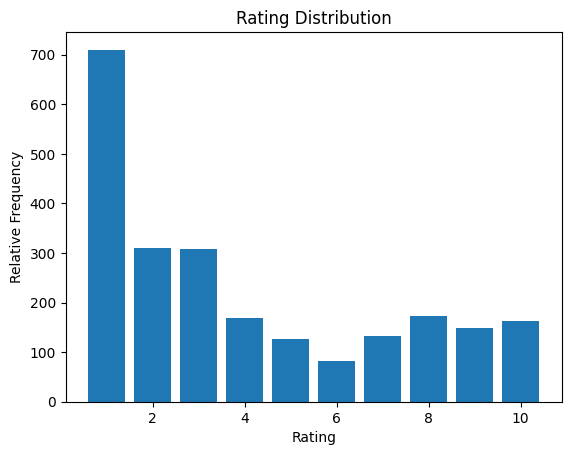

In [53]:
# number of occurrences of each rating value

df_s = df[df['overall rating'] != 0]
rating_distribution = df_s['overall rating'].value_counts()

plt.bar(rating_distribution.index, rating_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Relative Frequency')
plt.title('Rating Distribution')
plt.show()

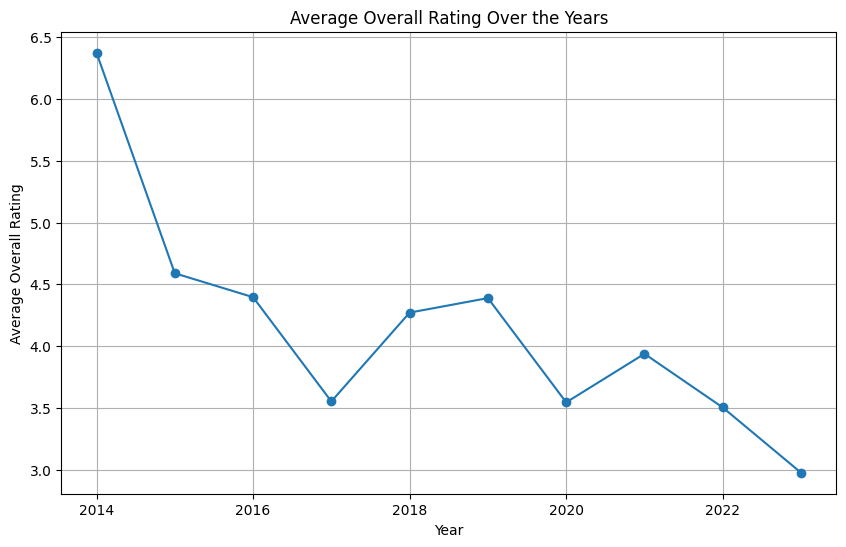

In [54]:
# Extract the year from the "date flown" column
df['year'] = df['date flown'].dt.year

# Group the data by year and calculate the mean overall rating
average_ratings_by_year = df.groupby('year')['overall rating'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o')
plt.title('Average Overall Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()

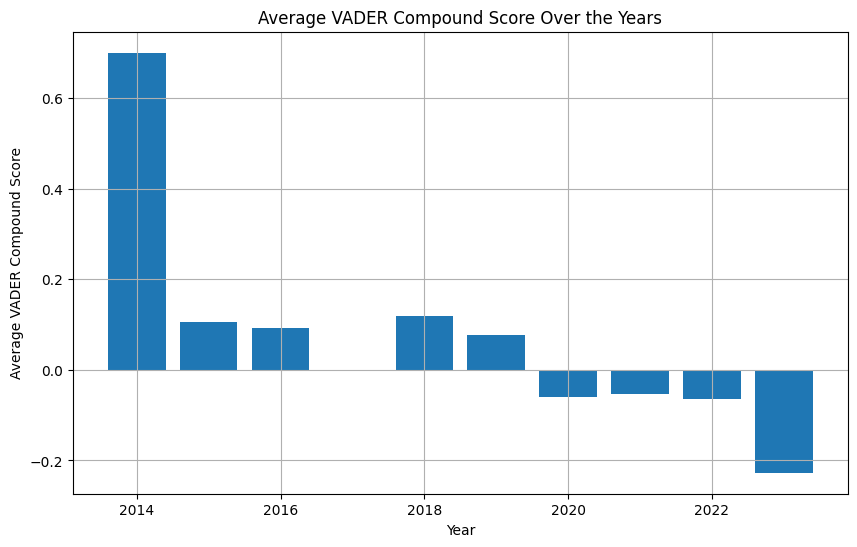

In [55]:
# Extract the year from the "date flown" column
df['year'] = df['date flown'].dt.year

# Group the data by year and calculate the mean VADER compound score
average_vader_scores_by_year = df.groupby('year')['vader_compound'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_vader_scores_by_year.index, average_vader_scores_by_year.values)
plt.title('Average VADER Compound Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average VADER Compound Score')
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


flight: 3554
BA: 2447
seat: 2041
British Airway: 1651
food: 1171
service: 1100
time: 1069
one: 1019
airline: 855
check: 793
London: 787
hour: 781
good: 772
staff: 753
business class: 753
plane: 706
passenger: 704
crew: 665
u: 635
drink: 592


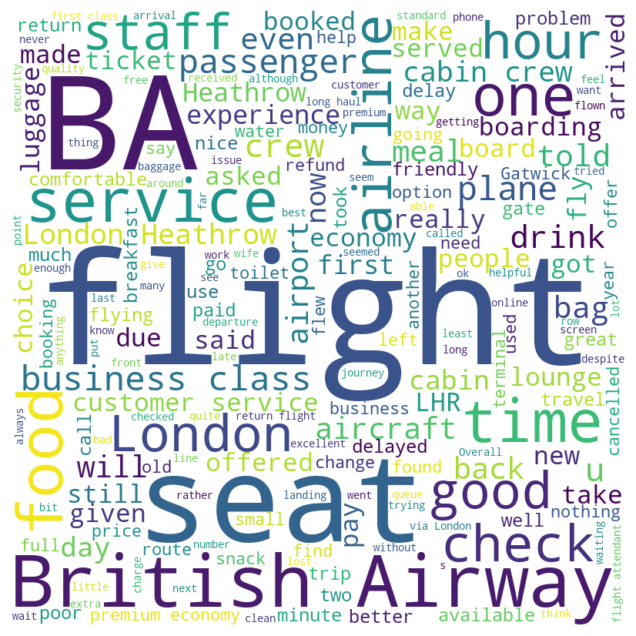

In [66]:
"""The wordcloud library would give an insight of the most used words in the comment body. 
This can tell what sector of the airline most complained about"""

# creating wordcloud
stop_words = set(stopwords.words('english'))

reviews = [word for word in df['comment body'] if word not in stop_words]

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews))

# Get word frequencies
word_frequencies = wordcloud.process_text(' '.join(reviews))

# Print top 10 words
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:20]
for word, frequency in top_words:
    print(f"{word}: {frequency}")

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Considering the above word cloud, we can further look at the sentiments around some of the most used words, which already have a category for rating in our initial dataframe. Words such as: 
'seat' which has rating categories for 'seat comfort' and 'seat type'.
'Food' which has the rating catergory 'food & drink'. 
'service' which we can look into the 'ground services' and 'cabin services' as we are not sure which is refered to. 

The 'Flight' and 'plane' would be an interesting one to analyse, however, this would need extensive further cleaning of the 'aircraft' and 'route'

In [69]:
# Print out the unique values in the 'seat type' column
unique_seat_types = df['seat type'].unique()
for seat_type in unique_seat_types:
    print(seat_type)

Business Class
Economy Class
First Class
Premium Economy
0


Analysing the sentiment and ratings around the 'seat'

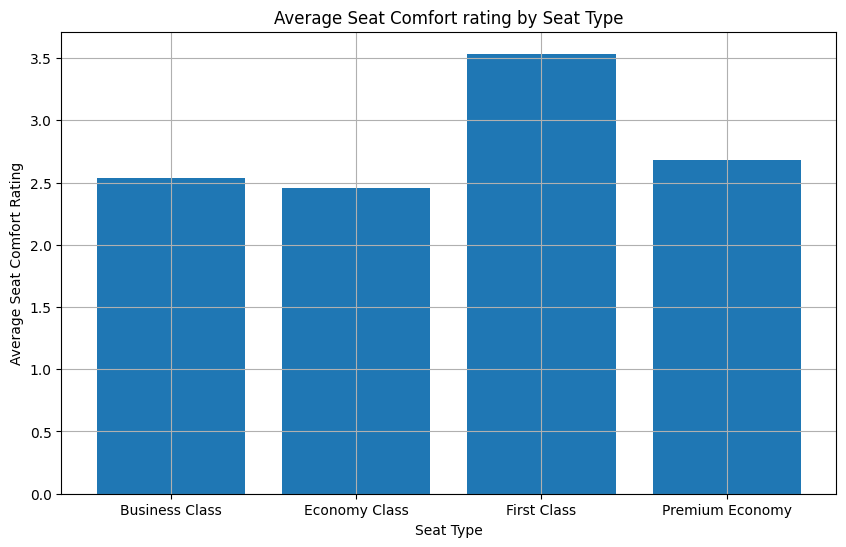

In [98]:
# Group the data by seat type and calculate the mean seat comfort for each type
mean_comfort_by_type = df.groupby('seat type')['seat comfort'].mean()

# Filter the Series to only include the specified seat types
selected_seat_types = ['Business Class', 'Economy Class', 'First Class', 'Premium Economy']
mean_comfort_selected_types = mean_comfort_by_type[mean_comfort_by_type.index.isin(selected_seat_types)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_comfort_selected_types.index)), mean_comfort_selected_types.values, tick_label=mean_comfort_selected_types.index)
plt.title('Average Seat Comfort rating by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Seat Comfort Rating')
plt.grid(True)
plt.show()


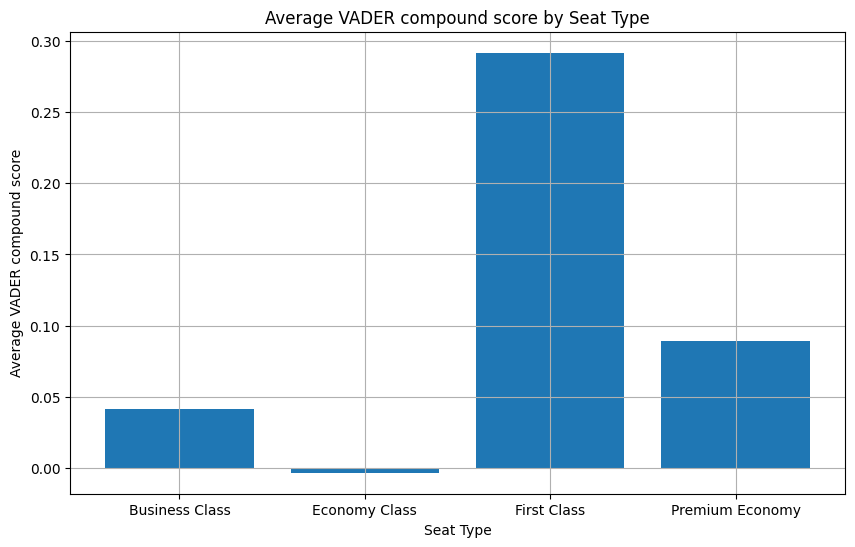

In [72]:
# Group the data by seat type and calculate the mean seat comfort for each type
mean_vader_compound_by_type = df.groupby('seat type')['vader_compound'].mean()

# Filter the Series to only include the specified seat types
selected_seat_types = ['Business Class', 'Economy Class', 'First Class', 'Premium Economy']
mean_comfort_selected_types = mean_vader_compound_by_type[mean_vader_compound_by_type.index.isin(selected_seat_types)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_comfort_selected_types.index)), mean_comfort_selected_types.values, tick_label=mean_comfort_selected_types.index)
plt.title('Average VADER compound score by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average VADER compound score')
plt.grid(True)
plt.show()

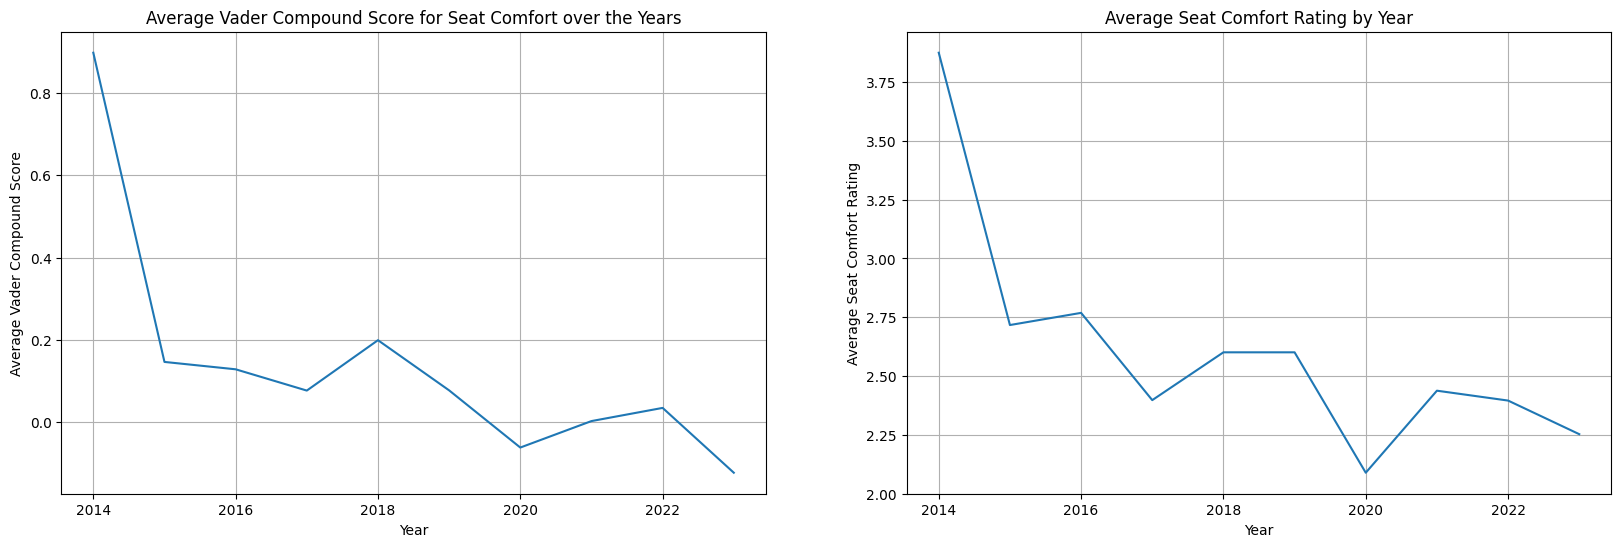

In [99]:
# Convert the date column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])

# Filter the DataFrame to only include rows where 'comment body' contains 'seat'
df_seat = df[df['comment body'].str.contains('seat')]

# Group the data by year and calculate the mean 'vader_compound' score for each year
mean_vader_by_year = df_seat.groupby(df_seat['date flown'].dt.year)['vader_compound'].mean()

# Group the data by year and calculate the mean 'seat comfort' rating for each year
mean_seat_comfort_by_year = df.groupby(df['date flown'].dt.year)['seat comfort'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Create the first line plot
axs[0].plot(mean_vader_by_year.index, mean_vader_by_year.values)
axs[0].set_title('Average Vader Compound Score for Seat Comfort over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Vader Compound Score')
axs[0].grid(True)

# Create the second line plot
axs[1].plot(mean_seat_comfort_by_year.index, mean_seat_comfort_by_year.values)
axs[1].set_title('Average Seat Comfort Rating by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Seat Comfort Rating')
axs[1].grid(True)

# Show the plots
plt.show()

Analysing the sentiment around 'food'

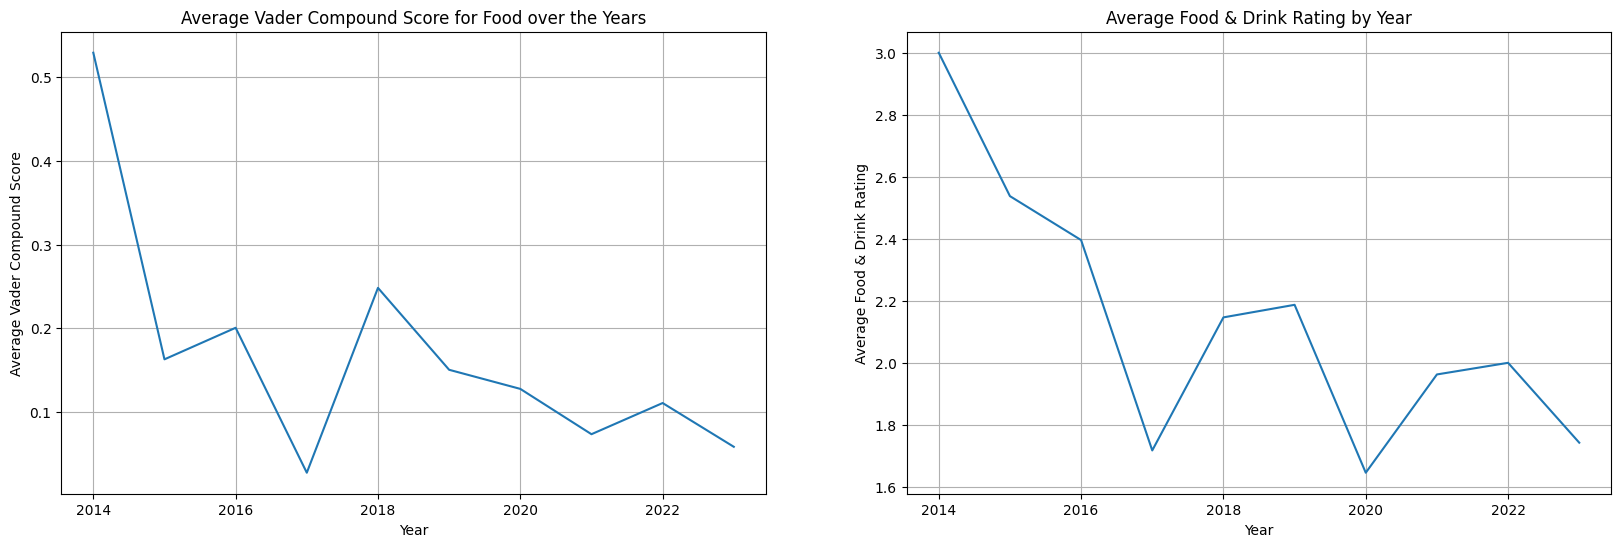

In [77]:
# Convert the date column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])

# Filter the DataFrame to only include rows where 'comment body' contains 'food'
df_food = df[df['comment body'].str.contains('food')]

# Group the data by year and calculate the mean 'vader_compound' score for each year
mean_vader_by_year = df_food.groupby(df_food['date flown'].dt.year)['vader_compound'].mean()

# Group the data by year and calculate the mean 'food & drink' rating for each year
mean_food_drink_by_year = df.groupby(df['date flown'].dt.year)['food & drink'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Create the first line plot
axs[0].plot(mean_vader_by_year.index, mean_vader_by_year.values)
axs[0].set_title('Average Vader Compound Score for Food over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Vader Compound Score')
axs[0].grid(True)

# Create the second line plot
axs[1].plot(mean_food_drink_by_year.index, mean_food_drink_by_year.values)
axs[1].set_title('Average Food & Drink Rating by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Food & Drink Rating')
axs[1].grid(True)

# Show the plots
plt.show()

Analysing sentiments around 'service' with respect to 'cabin service'

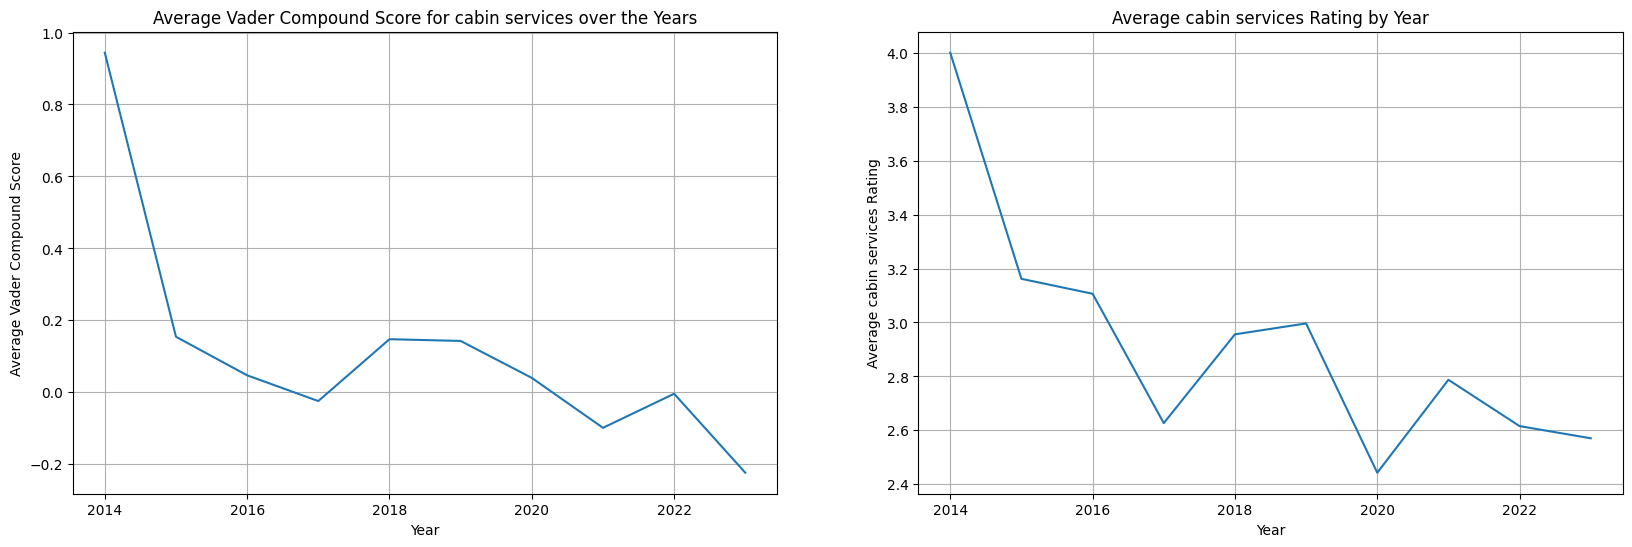

In [93]:
# Convert the date column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])

# Filter the DataFrame to only include rows where 'comment body' contains 'service'
df_services = df[df['comment body'].str.contains('service')]

# Group the data by year and calculate the mean 'vader_compound' score for each year
mean_vader_by_year = df_services.groupby(df_services['date flown'].dt.year)['vader_compound'].mean()

# Group the data by year and calculate the mean 'cabin services' rating for each year
mean_cabin_services_by_year = df.groupby(df['date flown'].dt.year)['cabin services'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Create the first line plot
axs[0].plot(mean_vader_by_year.index, mean_vader_by_year.values)
axs[0].set_title('Average Vader Compound Score for cabin services over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Vader Compound Score')
axs[0].grid(True)

# Create the second line plot
axs[1].plot(mean_cabin_services_by_year.index, mean_cabin_services_by_year.values)
axs[1].set_title('Average cabin services Rating by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average cabin services Rating')
axs[1].grid(True)

# Show the plots
plt.show()

Analysing sentiments around 'service' with respect to 'ground service'

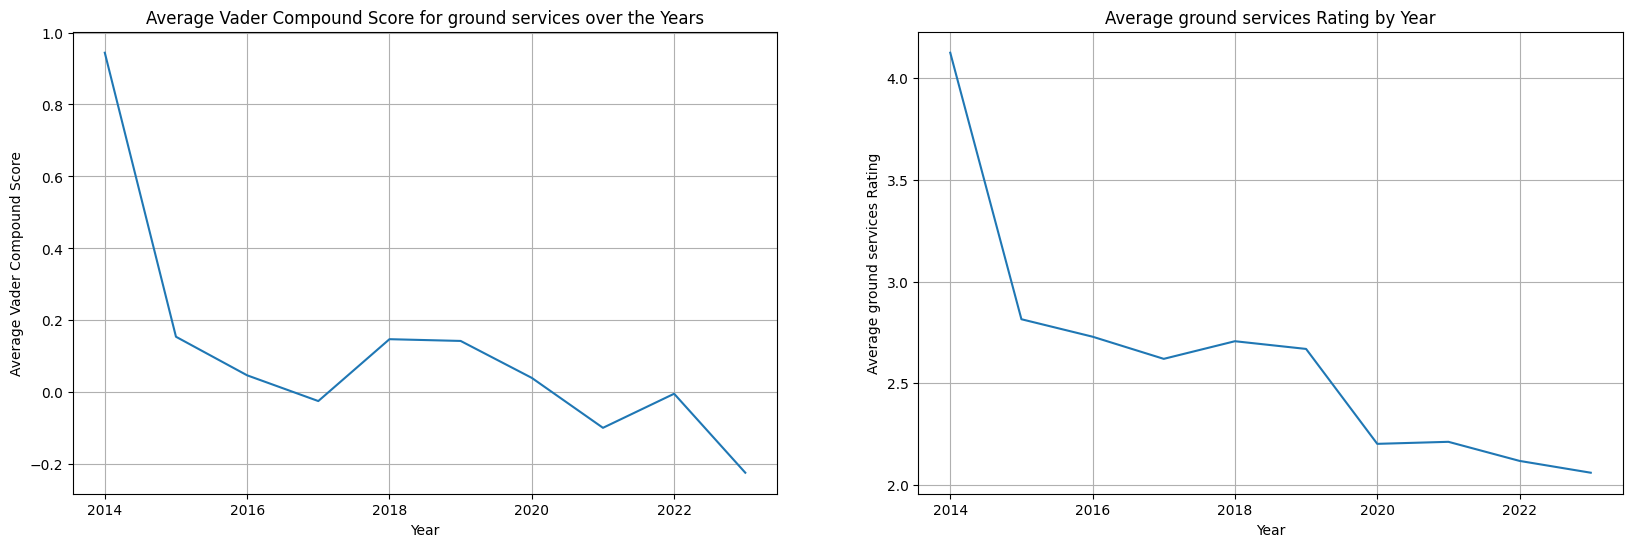

In [94]:
# Convert the date column to datetime
df['date flown'] = pd.to_datetime(df['date flown'])

# Filter the DataFrame to only include rows where 'comment body' contains 'service'
df_services = df[df['comment body'].str.contains('service')]

# Group the data by year and calculate the mean 'vader_compound' score for each year
mean_vader_by_year = df_services.groupby(df_services['date flown'].dt.year)['vader_compound'].mean()

# Group the data by year and calculate the mean 'ground services' rating for each year
mean_ground_services_by_year = df.groupby(df['date flown'].dt.year)['ground services'].mean()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Create the first line plot
axs[0].plot(mean_vader_by_year.index, mean_vader_by_year.values)
axs[0].set_title('Average Vader Compound Score for ground services over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Vader Compound Score')
axs[0].grid(True)

# Create the second line plot
axs[1].plot(mean_ground_services_by_year.index, mean_ground_services_by_year.values)
axs[1].set_title('Average ground services Rating by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average ground services Rating')
axs[1].grid(True)

# Show the plots
plt.show()

In [95]:
# select only the numeric columns for correlation analysis
df_corr = df[['overall rating', 'seat comfort', 'wifi', 'cabin services', 'food & drink', 'entertainment',  'ground services', 'value_money', 'recommended', 'vader_compound']]
corr = df_corr.corr()
corr

,overall rating,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended,vader_compound
overall rating,1.000000,0.718375,0.097414,0.696359,0.704590,0.384730,0.730613,0.867174,0.866534,0.657427
seat comfort,0.718375,1.000000,0.143007,0.654911,0.603863,0.398318,0.575170,0.675018,0.632347,0.486887
wifi,0.097414,0.143007,1.000000,0.127229,0.179217,0.266850,0.085133,0.085705,0.072480,0.030337
cabin services,0.696359,0.654911,0.127229,1.000000,0.692366,0.368137,0.563251,0.638998,0.625045,0.484892
food & drink,0.704590,0.603863,0.179217,0.692366,1.000000,0.504480,0.541956,0.662105,0.641109,0.468120
entertainment,0.384730,0.398318,0.266850,0.368137,0.504480,1.000000,0.354508,0.378719,0.335532,0.253595
ground services,0.730613,0.575170,0.085133,0.563251,0.541956,0.354508,1.000000,0.670410,0.628843,0.529546
value_money,0.867174,0.675018,0.085705,0.638998,0.662105,0.378719,0.670410,1.000000,0.802266,0.588192
recommended,0.866534,0.632347,0.072480,0.625045,0.641109,0.335532,0.628843,0.802266,1.000000,0.606930
vader_compound,0.657427,0.486887,0.030337,0.484892,0.468120,0.253595,0.529546,0.588192,0.606930,1.000000


<Axes: >

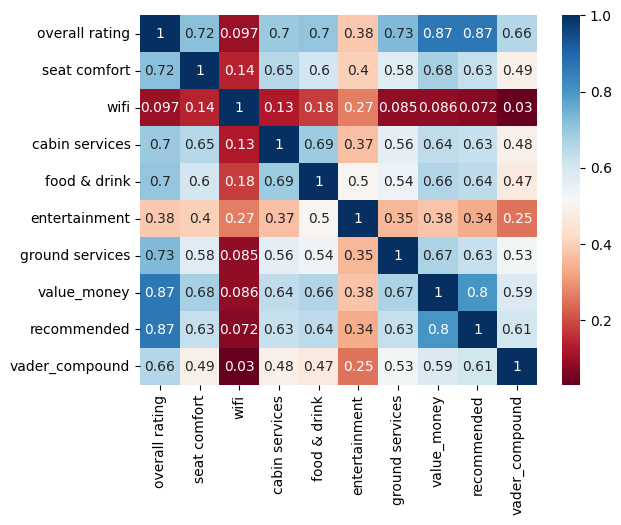

In [96]:
sns.heatmap(corr, cmap='RdBu', annot=True)

From the corrollation heatmap, we can see that attributes such as 'value_money', 'overall rating', 'recommended' are highly corrolated, hence we can use either one of them.

Example shown below, the relationship between overall rating and value for money:

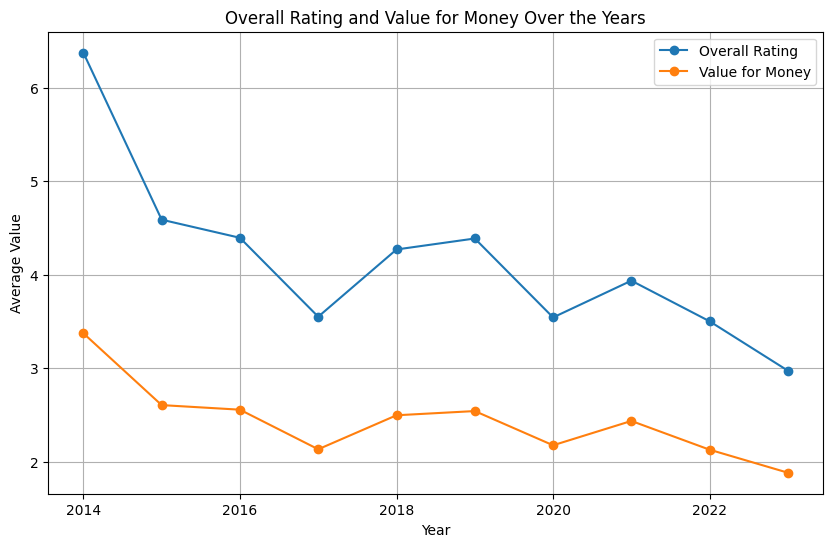

In [61]:
# Extract the year from the "date flown" column
df['year'] = df['date flown'].dt.year

# Group the data by year and calculate the mean overall rating and value_money for each year
mean_rating_by_year = df.groupby('year')['overall rating'].mean()
mean_value_money_by_year = df.groupby('year')['value_money'].mean()

# Create line plots
plt.figure(figsize=(10, 6))

plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', label='Overall Rating')
plt.plot(mean_value_money_by_year.index, mean_value_money_by_year.values, marker='o', label='Value for Money')

plt.title('Overall Rating and Value for Money Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

For further analysis we will use 'recommended' as a potential target variable, this will be to understand the likelihood of customer recommending the airline, which will invaribly leads to increased revenue.

In [100]:
# select only columns for correlation analysis
df_corr2 = df[[ 'seat comfort', 'wifi', 'cabin services', 'food & drink', 'entertainment',  'ground services', 'recommended', 'vader_compound']]
corr = df_corr2.corr()
corr

,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,recommended,vader_compound
seat comfort,1.000000,0.143007,0.654911,0.603863,0.398318,0.575170,0.632347,0.486887
wifi,0.143007,1.000000,0.127229,0.179217,0.266850,0.085133,0.072480,0.030337
cabin services,0.654911,0.127229,1.000000,0.692366,0.368137,0.563251,0.625045,0.484892
food & drink,0.603863,0.179217,0.692366,1.000000,0.504480,0.541956,0.641109,0.468120
entertainment,0.398318,0.266850,0.368137,0.504480,1.000000,0.354508,0.335532,0.253595
ground services,0.575170,0.085133,0.563251,0.541956,0.354508,1.000000,0.628843,0.529546
recommended,0.632347,0.072480,0.625045,0.641109,0.335532,0.628843,1.000000,0.606930
vader_compound,0.486887,0.030337,0.484892,0.468120,0.253595,0.529546,0.606930,1.000000


<Axes: >

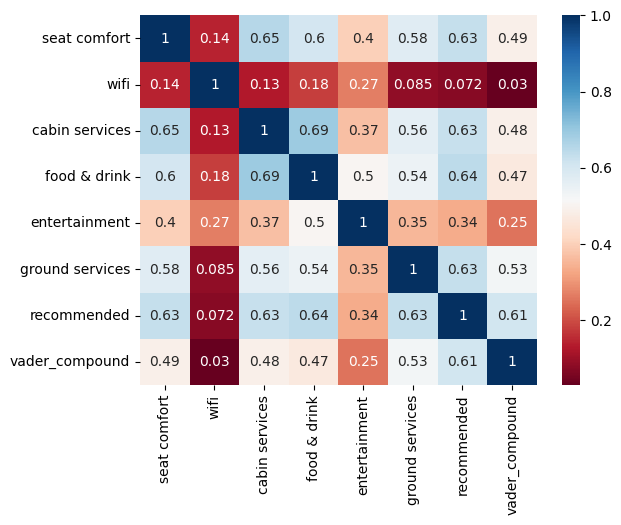

In [101]:
sns.heatmap(corr, cmap='RdBu', annot=True)

From the correlation heatmap, we can see that just as with the word cloud, 'seat comfort', 'cabin services', 'ground services' and 'food & drink' have the most influence on a customer choosing to recommend the airline. 

# MACHINE LEARNING

OLS (Ordinary Least Squares) Regression

Regression analysis is used here to determine the relationship between the independent variables and the dependent variable. It can help identify the extent to which each independent variable affects the dependent variable and determine which independent variable has the most significant impact on the dependent variable.
This information can be useful for the improvement of customer satisfaction by focusing on areas that have the most significant impact on the overall rating given by the customers.

We will use the OLS on 'recommended' and "overall rating' as the target/dependent variables

In [110]:
'''identifying which factors have the most significant impact on the overall rating'''

import statsmodels.api as sm

X = df[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df['overall rating']

# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         overall rating   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1267.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:54:16   Log-Likelihood:                -4375.3
No. Observations:                2324   AIC:                             8763.
Df Residuals:                    2318   BIC:                             8797.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1219      0.076    -

In [111]:
'''identifying which factors have the most significant impact on recommendation'''


X = df[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df['recommended']


# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            recommended   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     621.3
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:54:45   Log-Likelihood:                -486.37
No. Observations:                2324   AIC:                             984.7
Df Residuals:                    2318   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3726      0.014    -

The OLS Regression Results indicate that the model is statistically significant, explaining approximately 57.9% of the variance in the 'recommended' variable. The coefficients suggest that better 'seat comfort,' 'cabin services,' 'food & drink,' and 'ground services' increase the likelihood of a recommendation. For example, for each one-unit increase in 'seat comfort', 'recommended' increases by 0.0772 units, assuming all other factors remain constant. 

However, an improvement in 'entertainment' slightly decreases the likelihood of a recommendation, meaning entertainment is of little interest in most passengers. All predictors are statistically significant with p-values less than 0.05.

In summary, this analysis highlights the significant factors influencing the likelihood of a recommendation, including seat comfort, cabin services, food & drink, and ground services, while noting a counterintuitive relationship with entertainment.



I will apply machine learning algorithms to train a model to predict certain targets, based on independent variables which I will set.

In [103]:
'''feature selection done for the machine learning model'''

df_2 = df[['reviewer', 'overall rating', 'vader_compound', 'seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended']]

df_2.head()

,reviewer,overall rating,vader_compound,seat comfort,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Mal MacLeod,5,0.9882,3,4,1,1,3,2,0
1,J Tydeman,4,-0.6127,3,3,3,2,2,2,0
8,Hugh Kilpatrick,1,-0.9273,1,5,3,3,5,1,0
9,Glenn Taylor-Biffen,1,-0.8614,1,1,1,0,1,1,0
13,S Harten,1,-0.5844,3,1,1,0,1,1,0


In [104]:
# Split into train (80%), and test (20%)
df_train, df_test = train_test_split(df_2, test_size=0.2, random_state=42)

# Print the shapes of the sets
print("Train set:", df_train.shape)

print("Test set:", df_test.shape)

Train set: (1859, 10)
Test set: (465, 10)


In [107]:
'''model building using Random Forest Classifier'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target
x = df_train.drop(columns=['reviewer', 'recommended'])
y = df_train['recommended']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9543010752688172


In [108]:
# Assuming that df_test is your test data
x_test = df_test.drop(columns=['reviewer', 'recommended'])
y_test = df_test['recommended']

# Make predictions on test data
y_pred = model.predict(x_test)

# Create a DataFrame with reviewer, actual and predicted values
df_results = pd.DataFrame({'Reviewer': df_test['reviewer'], 'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
df_results.head(10)


,Reviewer,Actual,Predicted
5561,Alexander Dangler,0,0
3065,H Neale,0,0
5721,Leo Reuter,1,1
6086,Lewis Dwyer,0,0
6134,B Richardson,1,1
1410,M Himer,0,0
3469,Jakub Dostal,0,0
3652,C Hearn,0,0
3654,Kah Kay Au,1,1
3250,Lukas Steinberger,0,0


[[327   8]
 [  8 122]]


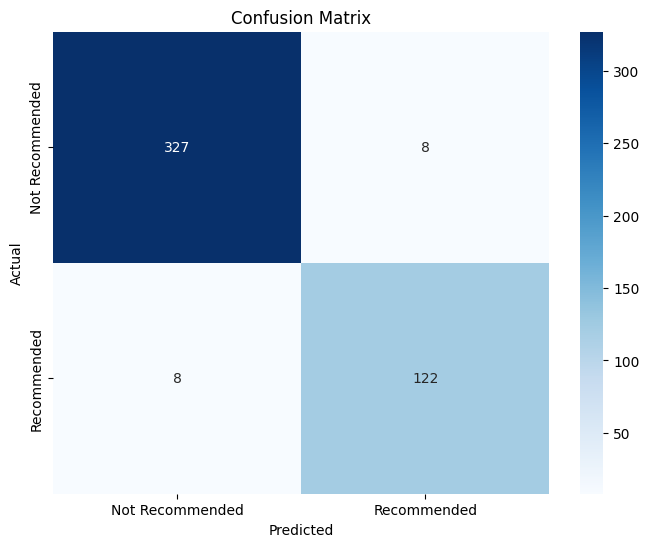

In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results is the DataFrame with reviewer, actual, and predicted values
conf_matrix = confusion_matrix(df_results['Actual'], df_results['Predicted'])
print(conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()